1. Use ```scipy.optimize.curve_fit``` to fit now a parabola (with a $x^2$ term) to the price vs. carat data. Import the data with:

In [4]:
import pandas as pd
diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv', index_col=0)

In [8]:
import scipy.optimize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def myfun(x, a, b):
    return a*x**2+ b

popt, _ = scipy.optimize.curve_fit(f=myfun, xdata=diams.carat, ydata=diams.price)

In [9]:
popt

array([9085.54694057,  707.2354052 ])

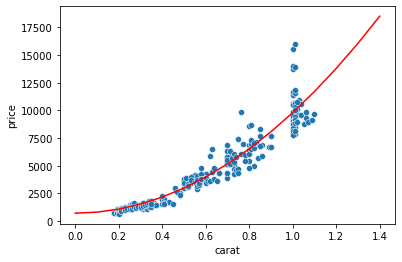

In [10]:
sns.scatterplot(data=diams, x=diams.carat, y=diams.price);
plt.plot(np.arange(0,1.5,0.1), myfun(np.arange(0,1.5,0.1), *popt), 'r');

2. You are given the noise data below. Try to find the local *minima* by first without then with filtering the data with a Wiener filter.

In [11]:
x_vect = np.arange(0,20,0.1)
y_vect = 2*x_vect + 3*np.cos(x_vect) + 1*np.random.randn(len(x_vect))

Using a distance between minima of 15, we recover the true minima after filtering, while before the noise creates many "fake" minima:

In [12]:
import scipy.signal

filterd_y= scipy.signal.wiener(y_vect, 20)

local_min, _ = scipy.signal.find_peaks(-y_vect, distance=15)
local_min_filt, _ = scipy.signal.find_peaks(-filterd_y, distance=15)

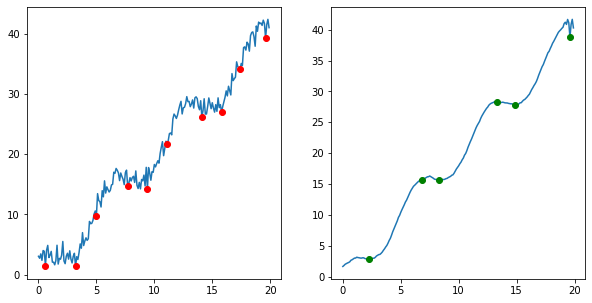

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x_vect, y_vect)
ax[1].plot(x_vect, filterd_y)
ax[0].plot(x_vect[local_min], y_vect[local_min],'ro')
ax[1].plot(x_vect[local_min_filt], filterd_y[local_min_filt],'go');

3. Try to do an ordinary least square fit of the signal knowing there's a ```cos``` component:

We first try with a simple linear model:

In [16]:
import statsmodels.api as sm

model = sm.OLS(y_vect, x_vect[:, np.newaxis])

In [17]:
res = model.fit()

In [18]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.991e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                   2.05e-201
Time:                        17:36:57   Log-Likelihood:                         -452.20
No. Observations:                 200   AIC:                                      906.4
Df Residuals:                     199   BIC:                                      909.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0181      0.014    141.088      0.000       1.990       2.046
==============================================================================
Omnibus:                       60.764   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.688
Skew:                          -0.082   Prob(JB):                      0.00478
Kurtosis:                       1.879   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

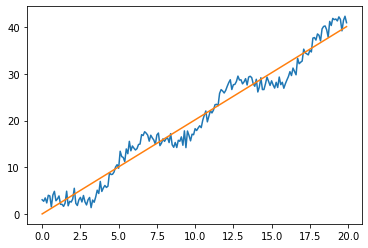

In [19]:
pred_x = res.predict(x_vect)

plt.plot(x_vect, y_vect)
plt.plot(x_vect, pred_x);

Now we add a sin component to the independent variables:

In [20]:
x_new = pd.DataFrame({'lin': x_vect, 'cos': np.cos(x_vect)})

In [21]:
x_new.head(3)

,lin,cos
0,0.0,1.000000
1,0.1,0.995004
2,0.2,0.980067


Now we do the fit again:

In [22]:
model = sm.OLS(y_vect, x_new)

In [23]:
res = model.fit()

In [24]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.940e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                   7.79e-276
Time:                        17:37:01   Log-Likelihood:                         -273.88
No. Observations:                 200   AIC:                                      551.8
Df Residuals:                     198   BIC:                                      558.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lin            1.9987      0.006    338.079      0.000       1.987       2.010
cos            2.9770      0.095     31.303      0.000       2.789       3.165
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.724
Skew:                           0.073   Prob(JB):                        0.696
Kurtosis:                       2.744   Cond. No.                         16.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

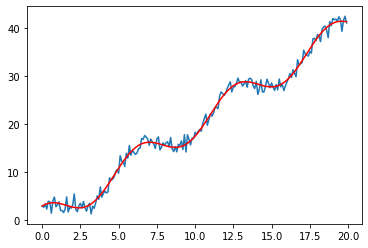

In [25]:
pred_x = res.predict(x_new)

plt.plot(x_vect, y_vect)
plt.plot(x_vect, pred_x, 'r');